1) Escolher Tema/Problema de negócio de TAREFA Supervisionada (Regressão, Classificação, PLN)

2) Escolher Tema/Problema de negócio de TAREFA Não supervisionada (Agrupamento, Regras de Associação, Detecção de Anomalias, Segmentação de Imagens, Rotulagem em problema semisupervisionado etc.)

--------------

Cada Tarefa deverá justificar a escolha de algoritmo, descrever o problema (introdução) explicitando variáveis alvo, variáveis e features usadas, transformação de variáveis, pipelines etc.

Considere usar o Cookie Cutter para organizar as pastas do projeto

Considerem bases disponíveis de dados, ou mesmo a obtenção/criação de datasets para seu problema.

Usar métricas apropriadas para julgar os modelos.

Implementem UI para consumo do modelo e output para o user.

# **COLUNAS**
**ID** - ID do Paciente

**A1_Score** to A10_Score - Pontuação baseada no espectro do autismo

**age** - Idade em anos

**gender** - Genero

**ethnicity** - Etnia

**jaundice** - Se o paciente tinha icterícia no momento do nascimento

**autism** - Se algum familiar tem autismo

**contry_of_res** - País do paciente

**used_app_before** - Se o paciente foi submetido a um teste de triagem antes

**result** - Pontuação para teste de triagem AQ1-10

**age_desc** - Idade do paciente

**relation** - Relação do paciente que completou o teste

**Class/ASD** - Resultado classificado como 0 ou 1. 0 representa Não e 1 representa Sim. Esta é a coluna de traget.

In [70]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.pipeline import Pipeline
from sklearn import preprocessing, metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [81]:

df_train = pd.read_csv("http://raw.githubusercontent.com/Erickhbs/III-ml/refs/heads/main/data/train.csv")
df_test = pd.read_csv("http://raw.githubusercontent.com/Erickhbs/III-ml/refs/heads/main/data/test.csv")

df_train = df_train.drop(columns=['contry_of_res', 'ID', 'age_desc','gender','jaundice', 'relation','used_app_before', 'age'], axis=1)
df_test = df_test.drop(columns=['contry_of_res', 'ID', 'age_desc','gender','jaundice', 'relation','used_app_before', 'age'], axis=1)


array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [82]:

df_train.loc[df_train["ethnicity"].isin({"Pasifika", "Hispanic", "Turkish"}), "ethnicity"] = "Others"
df_test.loc[df_test["ethnicity"].isin({"Pasifika", "Hispanic", "Turkish"}), "ethnicity"] = "Others"

le = preprocessing.LabelEncoder()
df_train['austim'] = le.fit_transform(df_train['austim'])
df_test['austim'] = le.transform(df_test['austim'])
df_train['ethnicity'] = le.fit_transform(df_train['ethnicity'])
df_test['ethnicity'] = le.transform(df_test['ethnicity'])
df_train['ethnicity'].unique()


array([0, 7, 4, 5, 2, 1, 6, 3, 8])

In [80]:

X = df_train[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
              'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
              'austim','result','ethnicity']]
y = df_train['Class/ASD']
X_test = df_test[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                  'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
                  'austim','result','ethnicity']]

print(X_test)
print(y)
print(X_test['ethnicity'].unique())

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         0         0         1         1         0   
1           1         0         0         0         0         0         0   
2           1         1         1         0         1         1         0   
3           0         0         0         0         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
195         1         1         0         0         1         0         0   
196         1         0         0         0         0         0         0   
197         1         0         0         0         0         0         1   
198         0         1         0         0         0         0         0   
199         1         0         0         0         0         0         1   

     A8_Score  A9_Score  A10_Score  austim     result  ethnicity  
0       

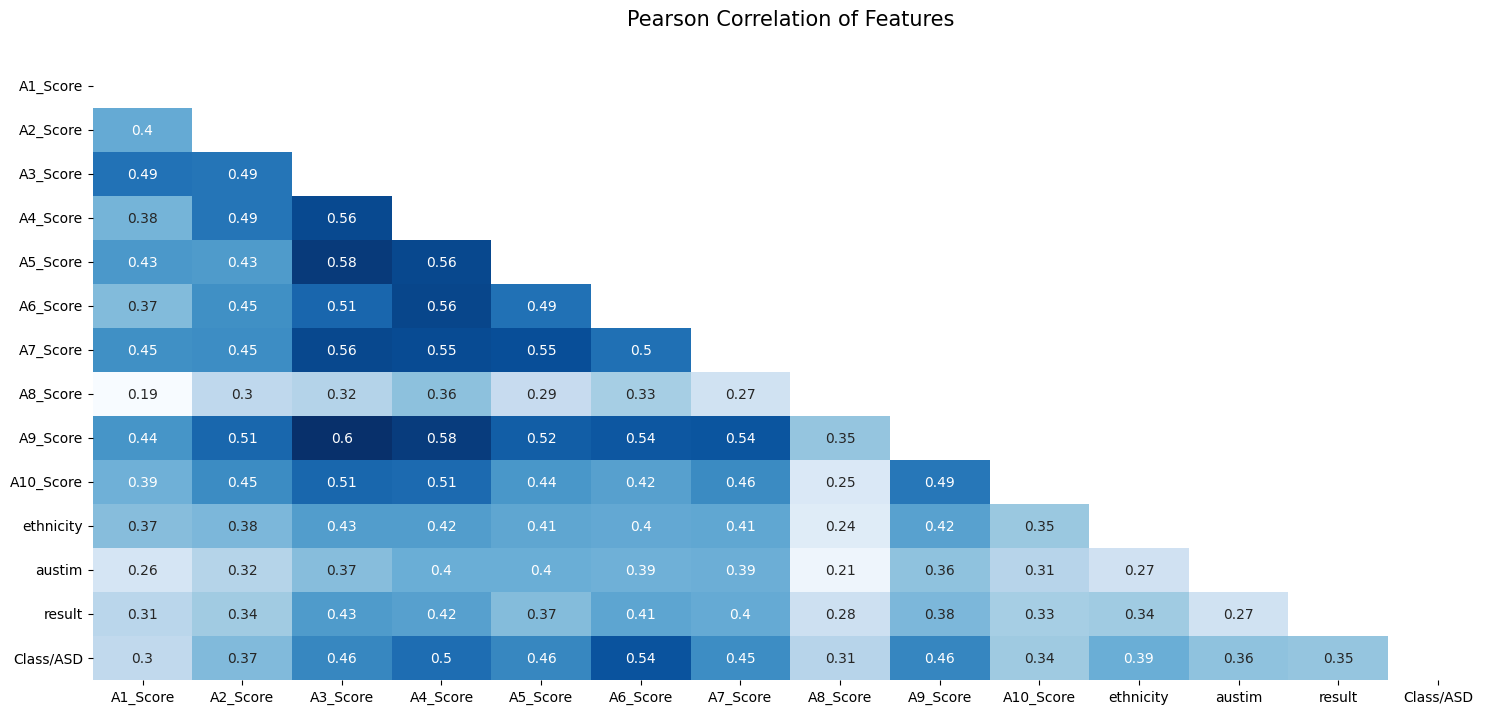

In [74]:
plt.figure(figsize=(18,8))
df = df_train.corr()
mask = np.triu(np.ones_like(df))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df, annot=True, cbar=False, cmap="Blues", mask=mask)
plt.show()


In [75]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

model_xt = ExtraTreesClassifier(random_state=0)
param_grid_xt = {'n_estimators': [50, 150, 200, 250, 300, 500, 1000],
                 'max_depth': [2, 4, 6, 8, 10]}
grid_model_xt = GridSearchCV(model_xt, param_grid_xt, cv=kf)
grid_model_xt.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=ExtraTreesClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 150, 200, 250, 300, 500, 1000]})

In [76]:
param_grid_lr = {"C": np.logspace(-3, 3, 10), "penalty": ["l1", "l2"]}
model_lr = LogisticRegression(solver='saga', tol=1e-5, max_iter=10000, random_state=0)
grid_model_lr = GridSearchCV(model_lr, param_grid_lr, cv=kf)
grid_model_lr.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=0,
                                          solver='saga', tol=1e-05),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2']})

In [77]:
y_pred_xt = grid_model_xt.predict(X)
y_pred_lr = grid_model_lr.predict(X)

accuracy_xt = accuracy_score(y, y_pred_xt)
accuracy_lr = accuracy_score(y, y_pred_lr)

print("Relatório de Classificação - Extra Trees Classifier:")
print(classification_report(y, y_pred_xt))

print("Relatório de Classificação - Logistic Regression:")
print(classification_report(y, y_pred_lr))

if accuracy_xt > accuracy_lr:
    print("Salvando ExtraTreesClassifier como o melhor modelo.")
    joblib.dump(grid_model_xt.best_estimator_, 'best_model.pkl')
else:
    print("Salvando LogisticRegression como o melhor modelo.")
    joblib.dump(grid_model_lr.best_estimator_, 'best_model.pkl')

Relatório de Classificação - Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       639
           1       0.71      0.63      0.67       161

    accuracy                           0.87       800
   macro avg       0.81      0.78      0.79       800
weighted avg       0.87      0.87      0.87       800

Relatório de Classificação - Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       639
           1       0.70      0.70      0.70       161

    accuracy                           0.88       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.88      0.88      0.88       800

Salvando LogisticRegression como o melhor modelo.
